In [87]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [88]:
df_business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

df_business['city'] = df_business['city'].str.upper()
df_business['state'] = df_business['state'].str.upper()

In [89]:
city_states = df_business.groupby(['city','state']).size().reset_index().sort_values(by=0,ascending=False)
print(city_states[city_states['state']=='BC'].head())
print()
print(city_states[city_states['state']=='BC'].tail())

                city state      0
683        VANCOUVER    BC  10301
581         RICHMOND    BC   1793
119          BURNABY    BC   1728
491  NORTH VANCOUVER    BC    926
173        COQUITLAM    BC    652

               city state  0
253  FRASER HEIGHTS    BC  1
377        LOUGHEED    BC  1
367       LIONS BAY    BC  1
338       KITSILANO    BC  1
328         KELOWNA    BC  1


In [90]:
df_bcbiz = df_business[df_business['state']=='BC']

In [91]:
df_bcbiz.head()

business_id                     name  \
5   D4JtQNTI4X3KcbzacDJsMw      Bob Likes Thai Food   
21  AvT2mGkdYwU0ghqDfs-OlQ   Tire Town Auto Service   
33  QciD6FbNklaJvUbLExD4Nw                     ARGO   
47  Xi2GGNzOiUS8r6WCFvu-fw           Kerala Kitchen   
48  0b9OJG4DWUqhdLotm_La7Q  Mid Century Modern Home   

                      address       city state postal_code   latitude  \
5                3755 Main St  VANCOUVER    BC         V5V  49.251342   
21     2032 Hastings Street E  VANCOUVER    BC     V5L 1T8  49.281059   
33  3790 Canada Way, Unit 108    BURNABY    BC     V5G 1G4  49.254436   
47       103- 9386 120 Street     SURREY    BC     V3V 4B9  49.173723   
48              1041 Kingsway  VANCOUVER    BC     V5V 3C7  49.253741   

     longitude  stars  review_count  is_open  \
5  -123.101333    3.5           169        1   
21 -123.063019    4.0             6        0   
33 -123.020050    4.0            76        1   
47 -122.889641    4.0             9        1   
48 -123.082838    3.5             9        1   

                                           attributes  \
5   {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
21                                               None   
33  {'WheelchairAccessible': 'False', 'Restaurants...   
47  {'BusinessParking': '{'garage': False, 'street...   
48  {'RestaurantsPriceRange2': '3', 'BusinessParki...   

                                           categories  \
5                                   Restaurants, Thai   
21                     Auto Repair, Automotive, Tires   
33  Food Delivery Services, Food, Restaurants, Med...   
47                                Indian, Restaurants   
48  Home & Garden, Furniture Stores, Shopping, Ant...   

                                                hours  
5   {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...  
21  {'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'...  
33  {'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...  
47  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
48  {'Monday': '11:0-18:0', 'Wednesday': '11:0-18:...

# Import Map of Vancouver's Neighborhoods

In [92]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import shapely.speedups

shapely.speedups.enable()

In [93]:
vancouvermap = gpd.read_file('Vancouver Geo Files/local-area-boundary.shp')
print(vancouvermap.columns)
vancouvermap.head(b)

Index(['mapid', 'name', 'geometry'], dtype='object')


mapid               name                                           geometry
0    DS  Dunbar-Southlands  POLYGON ((-123.17017 49.24789, -123.17025 49.2...
1  KERR         Kerrisdale  POLYGON ((-123.17908 49.21556, -123.17870 49.2...
2   KIL          Killarney  POLYGON ((-123.02356 49.20015, -123.03998 49.2...
3  KITS          Kitsilano  POLYGON ((-123.13768 49.27532, -123.14375 49.2...
4    SC       South Cambie  POLYGON ((-123.11599 49.23794, -123.11617 49.2...

# Import Coordinates of Vancouver's Bus Stops

In [132]:
busstops = gpd.read_file('Vancouver Geo Files/Vancouver Bus Stops.geojson')

for row in vancouvermap.iterrows():
#     print(row[1]['name'])
    invan_mask = busstops.within(row[1]['geometry'])
    busstops.loc[invan_mask,'neighborhood'] = row[1]['name']

busstops = busstops[busstops['neighborhood'].notnull()]
busstops.head()

stop_id stop_code                             stop_name  \
32      208     50207     NB GRANVILLE ST FS N CONNAUGHT DR   
33      209     50208         NB GRANVILLE ST FS NANTON AVE   
34      210     50209  NB GRANVILLE ST FS W KING EDWARD AVE   
35      211     50210        NB GRANVILLE ST FS BALFOUR AVE   
36      212     50211       NB GRANVILLE ST FS MATTHEWS AVE   

                           stop_desc   stop_lat    stop_lon zone_id stop_url  \
32     GRANVILLE ST @ N CONNAUGHT DR  49.245722 -123.139081   ZN 99            
33         GRANVILLE ST @ NANTON AVE  49.247690 -123.139023   ZN 99            
34  GRANVILLE ST @ W KING EDWARD AVE  49.250127 -123.138924   ZN 99            
35        GRANVILLE ST @ BALFOUR AVE  49.252263 -123.138834   ZN 99            
36       GRANVILLE ST @ MATTHEWS AVE  49.253467 -123.138804   ZN 99            

    location_type  parent_station                     geometry neighborhood  
32              0             NaN  POINT (-123.13908 49.24572)  Shaughnessy  
33              0             NaN  POINT (-123.13902 49.24769)  Shaughnessy  
34              0             NaN  POINT (-123.13892 49.25013)  Shaughnessy  
35              0             NaN  POINT (-123.13883 49.25226)  Shaughnessy  
36              0             NaN  POINT (-123.13880 49.25347)  Shaughnessy

# Import Coordinates of Vancouver's Rapid Transit Stations

In [140]:
rt_stations = gpd.read_file('Vancouver Geo Files/Vancouver Rapid Transit Stations.geojson')

rt_stations.head()

station       geo_local_area                     geometry
0              MARINE DRIVE              Marpole  POINT (-123.11707 49.20955)
1               VCC - CLARK           Strathcona  POINT (-123.07896 49.26578)
2                   NANAIMO  Renfrew-Collingwood  POINT (-123.05587 49.24827)
3  MAIN ST. - SCIENCE WORLD             Downtown  POINT (-123.10061 49.27318)
4       STADIUM - CHINATOWN             Downtown  POINT (-123.10956 49.27944)

# Construct GeoPandas DataFrame for Yelp Businesses in Vancouver

In [202]:
points = [Point(xy) for xy in zip(df_business['longitude'] , df_business['latitude'])]
geo_df = gpd.GeoDataFrame(df_business,
                          crs=vancouvermap.crs,
                          geometry=points)

for row in vancouvermap.iterrows():
    print(row[1]['name'])
    invan_mask = geo_df.within(row[1]['geometry'])
    geo_df.loc[invan_mask,'neighborhood'] = row[1]['name']

vangeo_df = geo_df[geo_df['neighborhood'].notnull()].reset_index(drop=True)

Dunbar-Southlands
Kerrisdale
Killarney
Kitsilano
South Cambie
Victoria-Fraserview
Arbutus-Ridge
Downtown
Fairview
Grandview-Woodland
Hastings-Sunrise
Marpole
Riley Park
Shaughnessy
Strathcona
West End
Kensington-Cedar Cottage
Mount Pleasant
Oakridge
Renfrew-Collingwood
Sunset
West Point Grey


# Generate Businesses Stacked by Single Category

In [203]:
# Prep data for stacking of business by category

# replace commas with semi-colons to split within categories column
vangeo_df['categories']=vangeo_df['categories'].str.replace(",",";")
# undo for exceptions
vangeo_df['categories']=vangeo_df['categories'].str.replace("Beer; Wine & Spirits","Beer, Wine & Spirits")
vangeo_df['categories']=vangeo_df['categories'].str.replace("Wills; Trusts; & Probates","Wills, Trusts, & Probates")
vangeo_df['categories']=vangeo_df['categories'].str.replace("Books; Mags; Music & Video",'Books, Mags, Music & Video')
vangeo_df['categories']=vangeo_df['categories'].str.replace("Used; Vintage & Consignment",'Used, Vintage & Consignment')
vangeo_df.head()

business_id                          name  \
0  D4JtQNTI4X3KcbzacDJsMw           Bob Likes Thai Food   
1  AvT2mGkdYwU0ghqDfs-OlQ        Tire Town Auto Service   
2  0b9OJG4DWUqhdLotm_La7Q       Mid Century Modern Home   
3  iX6_gILIkLUpO1r1BzwfvA                  Park Theatre   
4  zml5p2_hrHNDumKqsWGvfA  Community Thrift and Vintage   

                  address       city state postal_code   latitude   longitude  \
0            3755 Main St  VANCOUVER    BC         V5V  49.251342 -123.101333   
1  2032 Hastings Street E  VANCOUVER    BC     V5L 1T8  49.281059 -123.063019   
2           1041 Kingsway  VANCOUVER    BC     V5V 3C7  49.253741 -123.082838   
3      3440 Cambie Street  VANCOUVER    BC     V5Z 2W8  49.254479 -123.114869   
4      311 Carrall Street  VANCOUVER    BC     V6B 2J4  49.282218 -123.104458   

   stars  review_count  is_open  \
0    3.5           169        1   
1    4.0             6        0   
2    3.5             9        1   
3    4.0            31        1   
4    4.5            20        1   

                                          attributes  \
0  {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
1                                               None   
2  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
3                            {'GoodForKids': 'True'}   
4  {'RestaurantsPriceRange2': '2', 'BusinessParki...   

                                          categories  \
0                                  Restaurants; Thai   
1                     Auto Repair; Automotive; Tires   
2  Home & Garden; Furniture Stores; Shopping; Ant...   
3                       Cinema; Arts & Entertainment   
4  Shopping; Accessories; Fashion; Thrift Stores;...   

                                               hours  \
0  {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
1  {'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'...   
2  {'Monday': '11:0-18:0', 'Wednesday': '11:0-18:...   
3                                               None   
4  {'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...   

                      geometry              neighborhood  
0  POINT (-123.10133 49.25134)                Riley Park  
1  POINT (-123.06302 49.28106)        Grandview-Woodland  
2  POINT (-123.08284 49.25374)  Kensington-Cedar Cottage  
3  POINT (-123.11487 49.25448)                Riley Park  
4  POINT (-123.10446 49.28222)                  Downtown

In [204]:
# Step 1 of stacking businesses by category

# split by comma
category_series = vangeo_df['categories'].str.split('; ')

# replace null values with empty string to denote no category listed for a business
category_series.fillna(value='', inplace=True) 
category_series.head()

0                                  [Restaurants, Thai]
1                     [Auto Repair, Automotive, Tires]
2    [Home & Garden, Furniture Stores, Shopping, An...
3                       [Cinema, Arts & Entertainment]
4    [Shopping, Accessories, Fashion, Thrift Stores...
Name: categories, dtype: object

In [205]:
# Step 2 of stacking businesses by category
# Create dataframe from split values series and set index to business_id 
category_df = pd.DataFrame(category_series.tolist(),index=vangeo_df['business_id'])
print(category_df.loc[:,:2].head())

# stack
stacked_categories = category_df.stack()

# reset index to make business_id a column again and rename category column
stacked_categories = stacked_categories.reset_index(['business_id'])
stacked_categories = stacked_categories.rename(columns={0:'single category'})
stacked_categories.head()

                                    0                     1         2
business_id                                                          
D4JtQNTI4X3KcbzacDJsMw    Restaurants                  Thai      None
AvT2mGkdYwU0ghqDfs-OlQ    Auto Repair            Automotive     Tires
0b9OJG4DWUqhdLotm_La7Q  Home & Garden      Furniture Stores  Shopping
iX6_gILIkLUpO1r1BzwfvA         Cinema  Arts & Entertainment      None
zml5p2_hrHNDumKqsWGvfA       Shopping           Accessories   Fashion


business_id single category
0  D4JtQNTI4X3KcbzacDJsMw     Restaurants
1  D4JtQNTI4X3KcbzacDJsMw            Thai
0  AvT2mGkdYwU0ghqDfs-OlQ     Auto Repair
1  AvT2mGkdYwU0ghqDfs-OlQ      Automotive
2  AvT2mGkdYwU0ghqDfs-OlQ           Tires

# Import list of yelp main business categories

In [206]:
f = open("view-source_https___blog.yelp.com_2018_01_yelp_category_list.html", "r",encoding="utf-8")
page = f.read()
soup = BeautifulSoup(page)
soup.find_all('span' ,style="font-weight: 400;")
first_h2 = soup.h2
my_h2s = first_h2.find_all_next('h2',attrs={'class': None})

yelp_categories = []
for h2 in my_h2s:
    if h2.find('a') != None:
        yelp_categories.append(h2.text.strip())
print(len(yelp_categories))
yelp_categories

22


['Active Life',
 'Arts & Entertainment',
 'Automotive',
 'Beauty & Spas',
 'Education',
 'Event Planning & Services',
 'Financial Services',
 'Food',
 'Health & Medical',
 'Home Services',
 'Hotels & Travel',
 'Local Flavor',
 'Local Services',
 'Mass Media',
 'Nightlife',
 'Pets',
 'Professional Services',
 'Public Services & Government',
 'Real Estate',
 'Religious Organizations',
 'Restaurants',
 'Shopping']

# Generate Restaurants Dataset

In [485]:
vanrestaurants = vangeo_df[vangeo_df['categories'].str.contains("Restaurants",na=False)].copy()

# Generating Bayesian estimate of star rating means
min_reviews = vanrestaurants['review_count'].min()
mean_stars =  vanrestaurants['stars'].mean()

print(f"The minimum number of reviews in the restaurants dataset is {min_reviews}")
print(f"The mean star reviews in the restaurants dataset is {mean_stars}")

def bayes_stars(row):
    """
    Calculates Bayesian estimate of star rating means based on the
    minimum number of reviews in the dataset, the mean star rating,
    and the current listing's review and rating.
    In effect, the calculated rating reduces noise due to low sample counts;
    the less a title has votes, the more it is pulled towards the mean. 
    """
    R = row.stars 
    V = row.review_count
    C = mean_stars
    M = min_reviews
    bayes_stars = ((V / (V+M)) * R) + (M / (V+M)) * C
    return bayes_stars

vanrestaurants['bayes_stars'] = vanrestaurants.apply(bayes_stars,axis=1)
vanrestaurants.head(5)

The minimum number of reviews in the restaurants dataset is 5
The mean star reviews in the restaurants dataset is 3.521556886227545


business_id                         name  \
0   D4JtQNTI4X3KcbzacDJsMw          Bob Likes Thai Food   
8   jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
9   OfA_4cHgvlknHMcn0qNs2w               Little Caesars   
16  7ee6XyKyeduI-Rbc6L5j2Q            NingTu Restaurant   
17  r-hWf-bd9im5rj_l2MeofQ               Take Five Café   

                          address       city state postal_code   latitude  \
0                    3755 Main St  VANCOUVER    BC         V5V  49.251342   
8   1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
9                7010 Kerr Street  VANCOUVER    BC         V5S  49.219532   
16                  2130 Kingsway  VANCOUVER    BC     V5N 2T5  49.244079   
17       102-609 Granville Street  VANCOUVER    BC     V7Y 1H4  49.283532   

     longitude  stars  review_count  is_open  \
0  -123.101333    3.5           169        1   
8  -123.140261    4.5            31        0   
9  -123.040893    1.0             9        1   
16 -123.063337    4.0            60        0   
17 -123.117107    4.0            17        1   

                                           attributes  \
0   {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
8   {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
9   {'GoodForKids': 'True', 'RestaurantsReservatio...   
16  {'RestaurantsGoodForGroups': 'True', 'NoiseLev...   
17  {'BikeParking': 'True', 'WiFi': ''free'', 'Res...   

                                           categories  \
0                                   Restaurants; Thai   
8   Restaurants; Canadian (New); Sushi Bars; Ameri...   
9                                  Restaurants; Pizza   
16                               Restaurants; Chinese   
17             Food; Coffee & Tea; Restaurants; Cafes   

                                                hours  \
0   {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
8   {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
9   {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...   
16  {'Monday': '17:30-21:30', 'Tuesday': '17:30-21...   
17                                               None   

                       geometry              neighborhood  bayes_stars  
0   POINT (-123.10133 49.25134)                Riley Park     3.500619  
8   POINT (-123.14026 49.28636)                  West End     4.364105  
9   POINT (-123.04089 49.21953)                 Killarney     1.900556  
16  POINT (-123.06334 49.24408)  Kensington-Cedar Cottage     3.963197  
17  POINT (-123.11711 49.28353)                  Downtown     3.891263

# Clustering

In [486]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#### All Businesses

In [385]:
vanbusinesses = vangeo_df.copy()

X = vanbusinesses[['latitude','longitude']]

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.06, min_samples=10).fit(X)
kmeans= KMeans(n_clusters=40,random_state=42).fit(X)

labels_db = db.labels_
labels_km = kmeans.labels_

labels = labels_db

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

vanbusinesses['clusters'] = labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels
                                                                )
     )


Estimated number of clusters: 53
Estimated number of noise points: 755
Silhouette Coefficient: 0.072


#### Restaurants

Identify local maximum of silhouette score for DBSCAN Algorithm

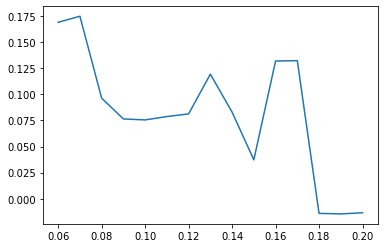

In [488]:
X = vanrestaurants[['latitude','longitude']]
X = StandardScaler().fit_transform(X)

sil = []
myrange = np.arange(0.06,0.2,0.01)
for eps in myrange:
    db_test = DBSCAN(eps=eps, min_samples=6).fit(X)
    labels_test = db_test.labels_
    sil.append(silhouette_score(X, labels_test, metric = 'euclidean'))
    
plt.plot(myrange,sil);

Identify local maximum of silhouette score for KMeans Algorithm

Highest Silhouette Score at 123


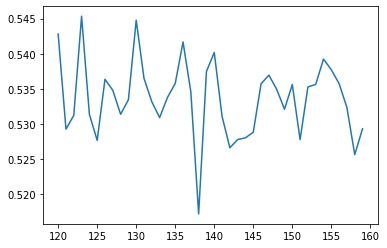

In [489]:
X = vanrestaurants[['latitude','longitude']]
X = StandardScaler().fit_transform(X)

sil = []
myrange = np.arange(120,160,1)
for k in myrange:
    kmeans_test = KMeans(n_clusters = k).fit(X)
    labels_test = kmeans_test.labels_
    sil.append(silhouette_score(X, labels_test, metric = 'euclidean'))
    
print(f"Highest Silhouette Score at {myrange[np.argmax(sil)]}")

plt.plot(myrange,sil);

Final clustering occurs here

In [495]:
X = vanrestaurants[['latitude','longitude']]

X = StandardScaler().fit_transform(X)
# pd.DataFrame(X).describe()

db = DBSCAN(eps=0.07, min_samples=6).fit(X)
kmeans= KMeans(n_clusters=123,random_state=42).fit(X)

labels_db = db.labels_
labels_km = kmeans.labels_

labels = labels_km

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

vanrestaurants['clusters'] = labels
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 123
Estimated number of noise points: 0
Silhouette Coefficient: 0.537


# Plotting businesses on map

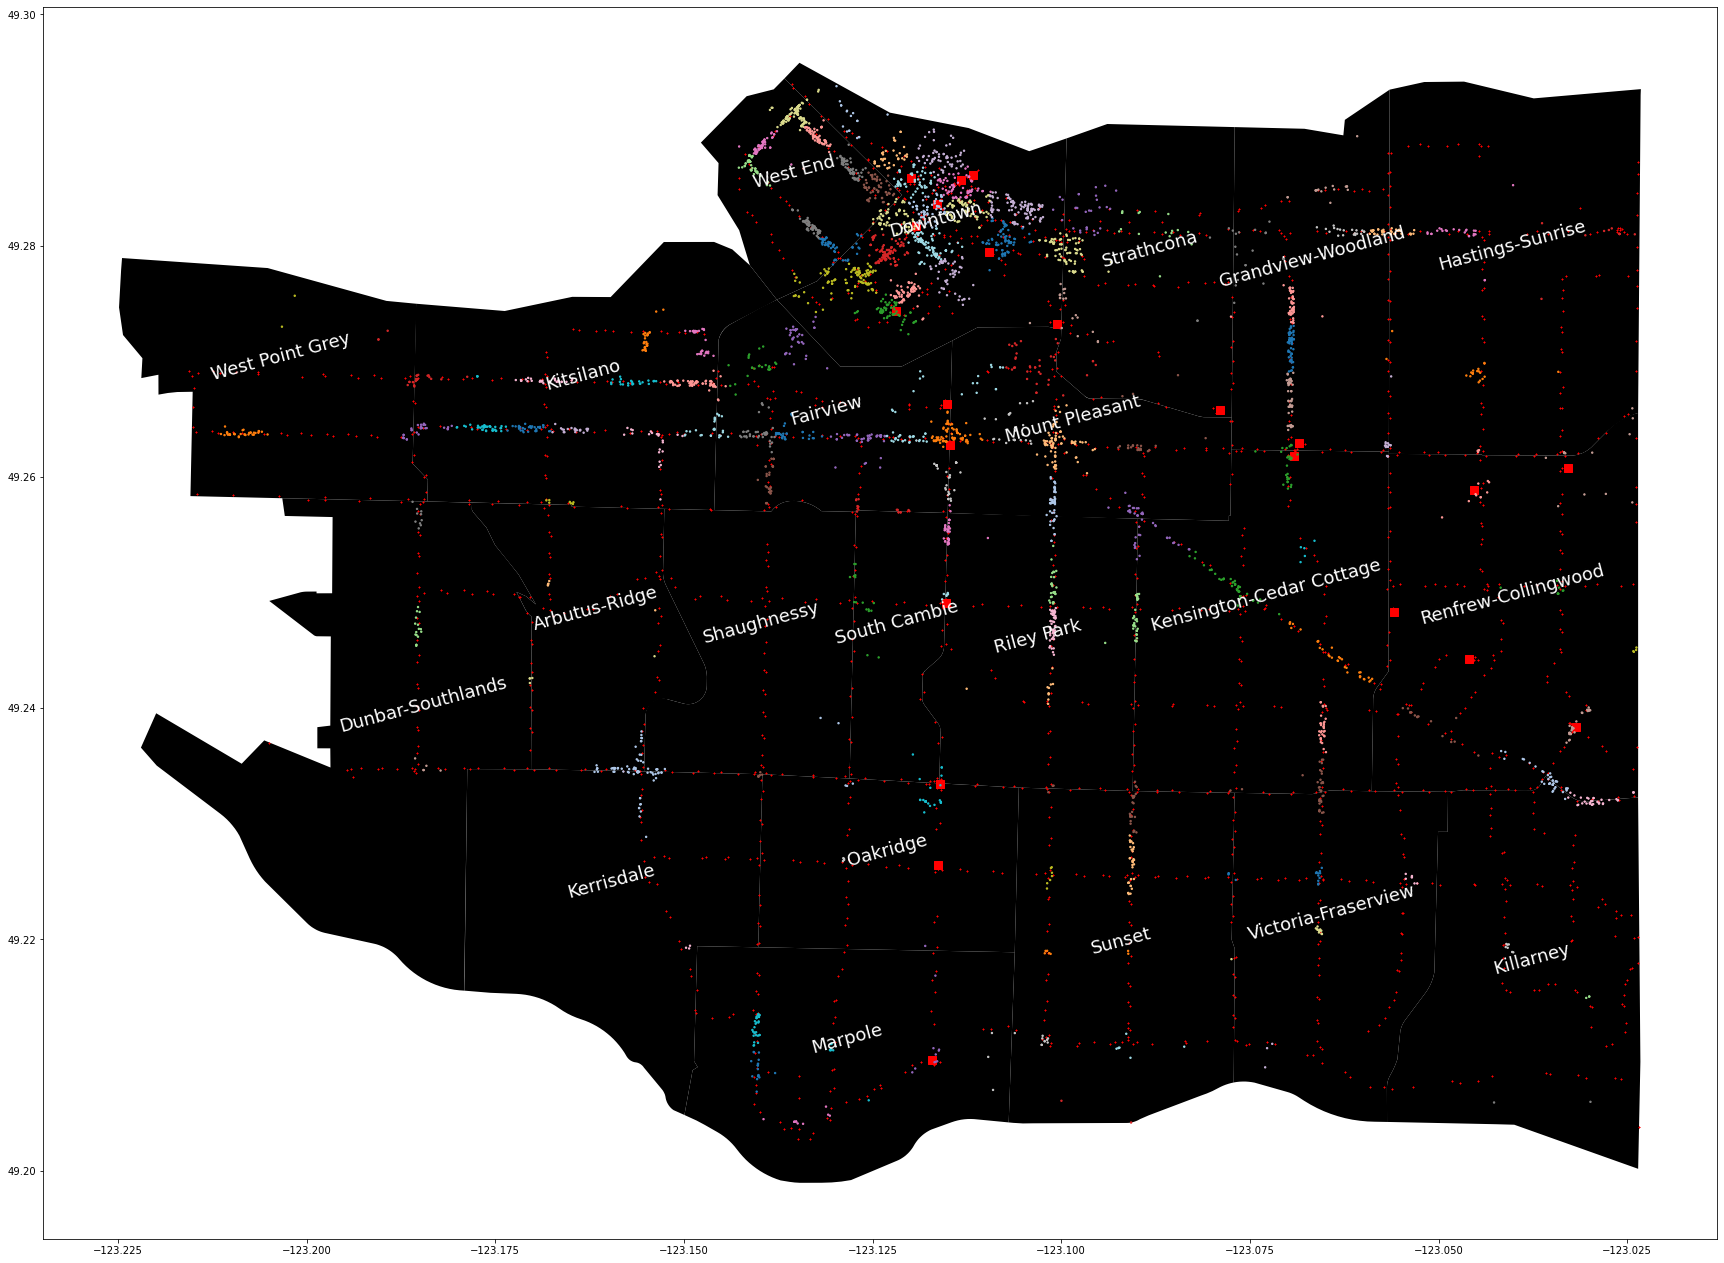

In [496]:
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap.plot(ax=ax, color='black');


# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] == 'Dunbar-Southlands':
        ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)

    else:
        ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
    #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                   rotation=15)
    # show the subplot
    ax.figure
    

busstops.plot(ax=ax, color='red',marker='x',markersize=1);    
rt_stations.plot(ax=ax, color = 'red', markersize = 50, marker='s' )
cmap = plt.cm.tab20
vanrestaurants[vanrestaurants['clusters']!=-1].plot(ax=ax,markersize=2,column='clusters',cmap = cmap);
# vanrestaurants[vanrestaurants['clusters']==-1].plot(ax=ax,markersize=2,color='white',marker='x');
# vanbusinesses[(vanbusinesses['clusters']!=-1)].plot(ax=ax,markersize=2,column='clusters',cmap = cmap);
# vanbusinesses[(vanbusinesses['clusters']==-1)].plot(ax=ax,markersize=2,color='white',marker='x');


[24  1  2  3  4 13  6  7  8 10 11 12 14 15 16 17 18 19 20 21 22 23 25 26
 27 28 29 30 31 32 33]


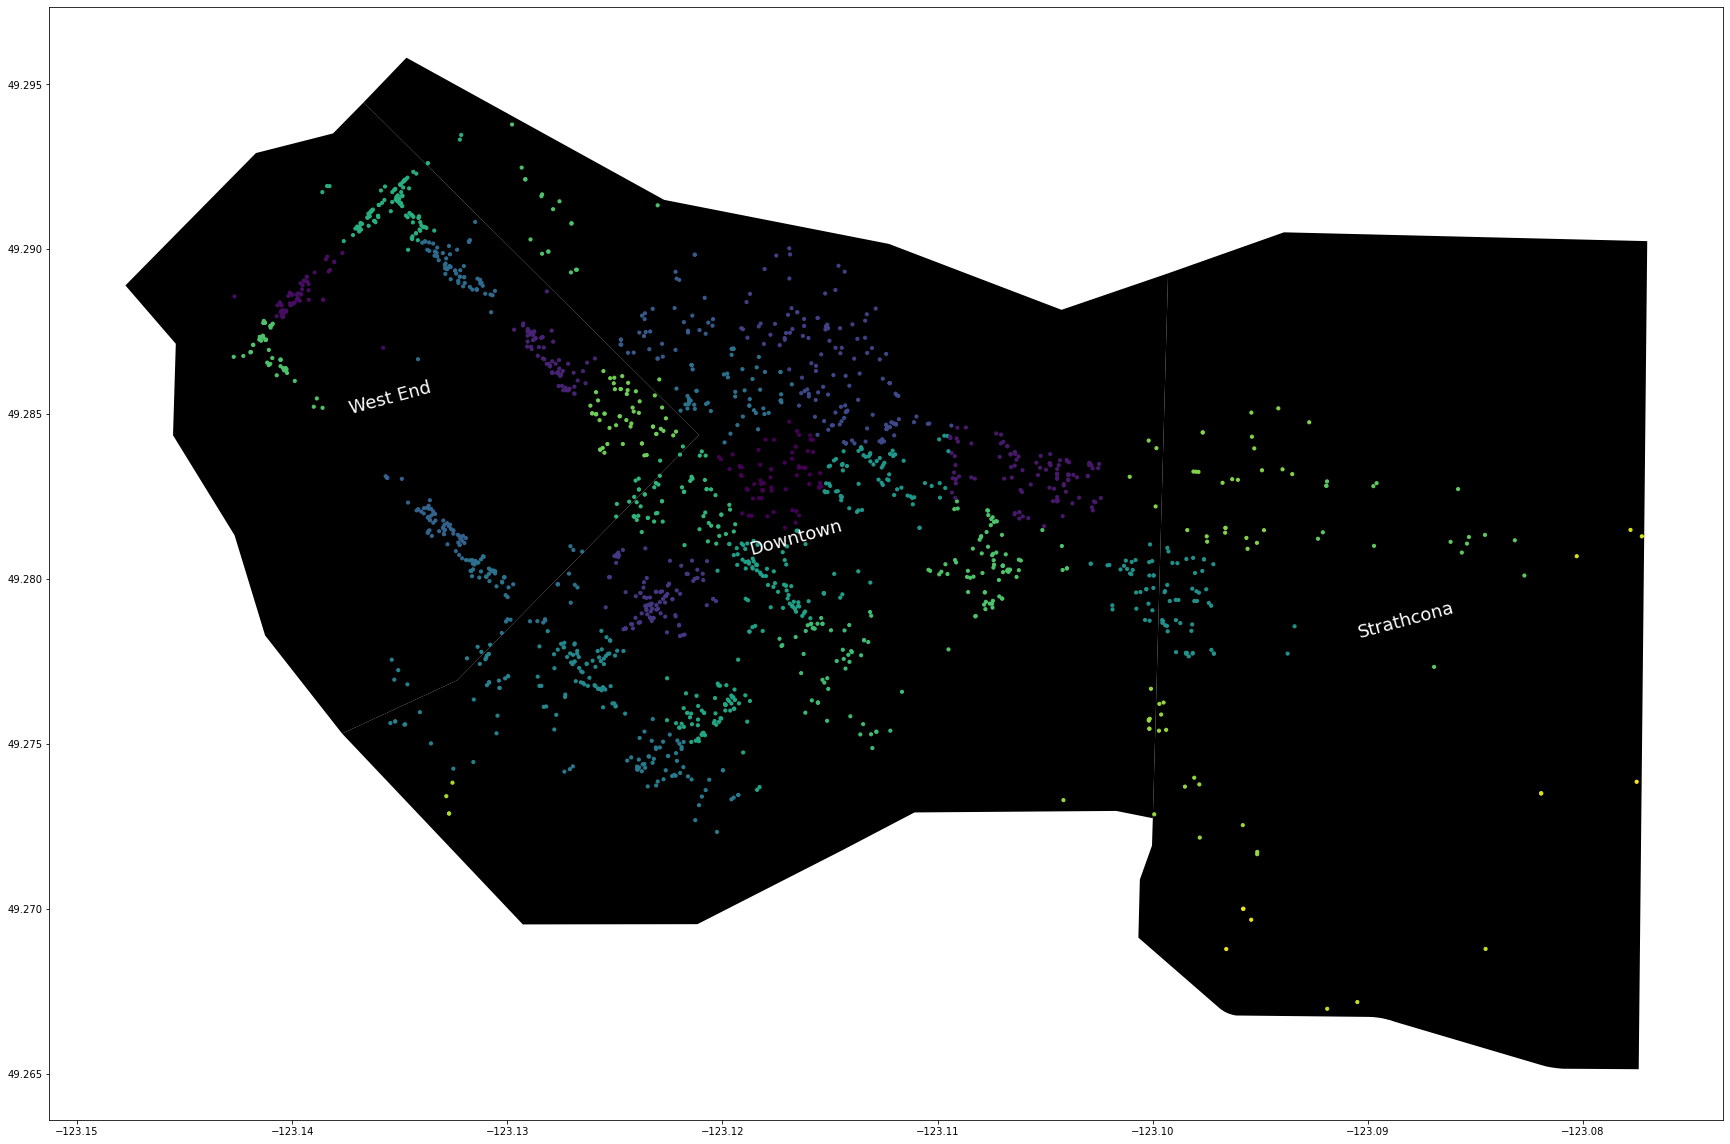

In [497]:
neighborhood = ['West End','Downtown','Strathcona']
fig,ax = plt.subplots(figsize=(30,30))
vancouvermap[vancouvermap['name'].isin(neighborhood)].plot(ax=ax, color='black');

cmap = plt.cm.Pastel1
# cmap = cmap.set_bad(color='white')

van_nbh = vanrestaurants[(vanrestaurants['neighborhood'].isin(neighborhood))].copy()

# Annotating neighborhood labels to polygons 
for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    if row[1]['name'] in neighborhood:
        if row[1]['name'] == 'Dunbar-Southlands':
            ax.annotate(text=row[1]['name'], xy=[geo.x+0.005, geo.y], color="white",ha='center', fontsize=18,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)

        else:
            ax.annotate(text=row[1]['name'], xy=[geo.x, geo.y], color="white",ha='center', fontsize=18,
        #                bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none'),
                       rotation=15)
        # show the subplot
        ax.figure

for i, cluster in enumerate(van_nbh[(van_nbh['clusters']!=-1)]['clusters'].unique()):
    van_nbh.loc[van_nbh['clusters'] == cluster,'clusters'] = i

# van_nbh[(van_nbh['clusters']==-1)].plot(ax=ax,markersize=10,color='w')    
van_nbh[(van_nbh['clusters']!=-1)].plot(ax=ax,markersize=10,column='clusters');
print(van_nbh['clusters'].unique())

In [498]:
vanrestaurants.head(1)

business_id                 name       address       city state  \
0  D4JtQNTI4X3KcbzacDJsMw  Bob Likes Thai Food  3755 Main St  VANCOUVER    BC   

  postal_code   latitude   longitude  stars  review_count  is_open  \
0         V5V  49.251342 -123.101333    3.5           169        1   

                                          attributes         categories  \
0  {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...  Restaurants; Thai   

                                               hours  \
0  {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   

                      geometry neighborhood  bayes_stars  clusters  
0  POINT (-123.10133 49.25134)   Riley Park     3.500619        31

In [499]:
vanrestos_sc = vanrestaurants.merge(stacked_categories,on='business_id',how='left',validate='1:m')
# restrict to subcategories
vanrestos_sc = vanrestos_sc[~vanrestos_sc['single category'].isin(yelp_categories)]
vanrestos_sc

business_id                         name  \
1      D4JtQNTI4X3KcbzacDJsMw          Bob Likes Thai Food   
3      jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
4      jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
5      jfDfHzAq6iKkRnzzZ4n1nQ  Let's Roll Custom Sushi Bar   
7      OfA_4cHgvlknHMcn0qNs2w               Little Caesars   
...                       ...                          ...   
18153  ZE2KU6QYcicqn0oO8YhZUQ          Baccano Osteria-Bar   
18155  dplKdpONowTjlPZvq0wSRw               Elysian Coffee   
18156  dplKdpONowTjlPZvq0wSRw               Elysian Coffee   
18158  dplKdpONowTjlPZvq0wSRw               Elysian Coffee   
18160  dplKdpONowTjlPZvq0wSRw               Elysian Coffee   

                              address       city state postal_code   latitude  \
1                        3755 Main St  VANCOUVER    BC         V5V  49.251342   
3       1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
4       1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
5       1184 Denman Street, Suite 104  VANCOUVER    BC     V6G 2M9  49.286360   
7                    7010 Kerr Street  VANCOUVER    BC         V5S  49.219532   
...                               ...        ...   ...         ...        ...   
18153               1889 W 1st Avenue  VANCOUVER    BC     V6J 5B8  49.270823   
18155  1100 Burrard Street, Suite 102  VANCOUVER    BC     V6Z 1Y9  49.279845   
18156  1100 Burrard Street, Suite 102  VANCOUVER    BC     V6Z 1Y9  49.279845   
18158  1100 Burrard Street, Suite 102  VANCOUVER    BC     V6Z 1Y9  49.279845   
18160  1100 Burrard Street, Suite 102  VANCOUVER    BC     V6Z 1Y9  49.279845   

        longitude  stars  review_count  is_open  \
1     -123.101333    3.5           169        1   
3     -123.140261    4.5            31        0   
4     -123.140261    4.5            31        0   
5     -123.140261    4.5            31        0   
7     -123.040893    1.0             9        1   
...           ...    ...           ...      ...   
18153 -123.147734    2.0             5        0   
18155 -123.127654    4.0            53        1   
18156 -123.127654    4.0            53        1   
18158 -123.127654    4.0            53        1   
18160 -123.127654    4.0            53        1   

                                              attributes  \
1      {'GoodForKids': 'True', 'Alcohol': 'u'none'', ...   
3      {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
4      {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
5      {'RestaurantsAttire': 'u'casual'', 'HasTV': 'F...   
7      {'GoodForKids': 'True', 'RestaurantsReservatio...   
...                                                  ...   
18153  {'WiFi': 'u'paid'', 'RestaurantsTakeOut': 'Tru...   
18155  {'RestaurantsPriceRange2': '1', 'GoodForMeal':...   
18156  {'RestaurantsPriceRange2': '1', 'GoodForMeal':...   
18158  {'RestaurantsPriceRange2': '1', 'GoodForMeal':...   
18160  {'RestaurantsPriceRange2': '1', 'GoodForMeal':...   

                                              categories  \
1                                      Restaurants; Thai   
3      Restaurants; Canadian (New); Sushi Bars; Ameri...   
4      Restaurants; Canadian (New); Sushi Bars; Ameri...   
5      Restaurants; Canadian (New); Sushi Bars; Ameri...   
7                                     Restaurants; Pizza   
...                                                  ...   
18153                               Italian; Restaurants   
18155  Coffee Roasteries; Breakfast & Brunch; Food; C...   
18156  Coffee Roasteries; Breakfast & Brunch; Food; C...   
18158  Coffee Roasteries; Breakfast & Brunch; Food; C...   
18160  Coffee Roasteries; Breakfast & Brunch; Food; C...   

                                                   hours  \
1      {'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...   
3      {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
4      {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...   
5    

In [500]:
vanrestos_sc.groupby(['clusters','single category',]).agg({'categories':'count','bayes_stars':'mean'}).reset_index()

clusters         single category  categories  bayes_stars
0            0          American (New)           1     2.964344
1            0  American (Traditional)           2     3.262238
2            0            Asian Fusion           4     3.152836
3            0                Bakeries           3     3.700803
4            0                Barbeque           2     3.500973
...        ...                     ...         ...          ...
5262       122             Steakhouses           1     3.501172
5263       122              Sushi Bars           2     3.502590
5264       122                    Thai           3     3.354373
5265       122                   Vegan           1     4.260778
5266       122              Vietnamese           1     4.296158

[5267 rows x 4 columns]

# Merge Stacked Categories and Create Main Dataset

In [207]:
vangeo_sc_df = vangeo_df.merge(stacked_categories,on='business_id',how='left',validate='1:m')

# Rearranging column order such that the last column (single category) is after categories
cols = vangeo_sc_df.columns.tolist()
after = cols.index('categories')+1
cols = cols[:after]+[cols[-1]] + cols[after:-1]
vangeo_sc_df = vangeo_sc_df[cols]

# restrict to subcategories
vangeo_sc_df = vangeo_sc_df[~vangeo_sc_df['single category'].isin(yelp_categories)]

print(vangeo_sc_df.shape)

# tag main categories
for category in yelp_categories:
    vangeo_sc_df[category] = 0
    vangeo_sc_df.loc[vangeo_sc_df['categories'].str.contains(category,na=False),category] = 1

print(vangeo_sc_df.columns)
mask0 = vangeo_sc_df['neighborhood'] == 'Arbutus-Ridge'
mask1 = vangeo_sc_df['single category'] == 'Accessories'
# mask0 = vangeo_sc_df['single category'] == 'Wineries'
vangeo_sc_df.loc[mask0 
                 & mask1                 
                 , :'neighborhood'].head()

(26733, 17)
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'single category', 'hours', 'geometry',
       'neighborhood', 'Active Life', 'Arts & Entertainment', 'Automotive',
       'Beauty & Spas', 'Education', 'Event Planning & Services',
       'Financial Services', 'Food', 'Health & Medical', 'Home Services',
       'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media',
       'Nightlife', 'Pets', 'Professional Services',
       'Public Services & Government', 'Real Estate',
       'Religious Organizations', 'Restaurants', 'Shopping'],
      dtype='object')


business_id                            name  \
11620  av18HuHSt9ZwnrWjVPnJKA                Isola Bella Kids   
13216  CEoLCwhZedkOhewHqsU95Q                             FAB   
32402  J66FaV_gnsZaU8AVavOveg  Buchan's Kerrisdale Stationery   

                  address       city state postal_code   latitude   longitude  \
11620     5692 Yew Street  VANCOUVER    BC     V6M 3Y3  49.234886 -123.157611   
13216  2305 W 41st Avenue  VANCOUVER    BC     V6M 2A3  49.234836 -123.159797   
32402  2141 41st Avenue W  VANCOUVER    BC     V6M 1Z6  49.234704 -123.156594   

       stars  review_count  is_open  \
11620    3.5             7        1   
13216    3.5             6        0   
32402    4.0             9        1   

                                              attributes  \
11620  {'BusinessParking': '{'garage': False, 'street...   
13216  {'RestaurantsPriceRange2': '3', 'BusinessParki...   
32402  {'BusinessParking': '{'garage': False, 'street...   

                                              categories single category  \
11620  Children's Clothing; Toy Stores; Fashion; Shoe...     Accessories   
13216   Women's Clothing; Accessories; Shopping; Fashion     Accessories   
32402  Flowers & Gifts; Arts & Crafts; Fashion; Event...     Accessories   

                                                   hours  \
11620  {'Monday': '0:0-0:0', 'Tuesday': '10:0-17:30',...   
13216                                               None   
32402  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   

                          geometry   neighborhood  
11620  POINT (-123.15761 49.23489)  Arbutus-Ridge  
13216  POINT (-123.15980 49.23484)  Arbutus-Ridge  
32402  POINT (-123.15659 49.23470)  Arbutus-Ridge

In [208]:
# Count of number of business ids by neighborhood
num_nbh_biz = vangeo_sc_df.groupby(['neighborhood']).agg({'business_id':'nunique'}).reset_index()
num_nbh_biz.rename(columns={'business_id':'business_count'},inplace=True)
num_nbh_biz.head(5)

neighborhood  business_count
0       Arbutus-Ridge             113
1            Downtown            2884
2   Dunbar-Southlands              87
3            Fairview            1023
4  Grandview-Woodland             566

In [209]:
# Count of number of business categories in city
num_cat_city = vangeo_sc_df.groupby('single category').agg({'business_id':'nunique'})
num_cat_city.rename(columns={'business_id':'total_category_count'},inplace=True)
num_cat_city =num_cat_city.reset_index()
num_cat_city.head(5)

single category  total_category_count
0      Acai Bowls                     3
1     Accessories                   220
2     Accountants                     6
3  Acne Treatment                     3
4     Acupuncture                   112

In [405]:
# Count of business categories by neighborhood
van_nbh_df = vangeo_sc_df.groupby(['neighborhood','single category']).agg({'business_id':'nunique'})
van_nbh_df.rename(columns={'business_id':'category_count'},inplace=True)
van_nbh_df = van_nbh_df.reset_index()

# merge category count for city
van_nbh_df = van_nbh_df.merge(num_cat_city,on='single category',how='left',validate='m:1')

# merge business count by neighborhood
van_nbh_df = van_nbh_df.merge(num_nbh_biz,on='neighborhood',how='left',validate='m:1')


van_nbh_df['total_business_count'] = num_nbh_biz['business_count'].sum()
# van_nbh_df=van_nbh_df[van_nbh_df['category_count']>=8]
van_nbh_df['incidence ratio'] = (van_nbh_df['category_count'] / van_nbh_df['total_category_count']) \
                                * (van_nbh_df['total_business_count'] / van_nbh_df['business_count'])
van_nbh_df

neighborhood         single category  category_count  \
0       Arbutus-Ridge             Accessories               3   
1       Arbutus-Ridge             Acupuncture               1   
2       Arbutus-Ridge                   Adult               1   
3       Arbutus-Ridge          American (New)               1   
4       Arbutus-Ridge  American (Traditional)               1   
...               ...                     ...             ...   
5442  West Point Grey                  Waxing               1   
5443  West Point Grey               Wine Bars               1   
5444  West Point Grey                Wineries               1   
5445  West Point Grey        Women's Clothing               1   
5446  West Point Grey                    Yoga               1   

      total_category_count  business_count  total_business_count  \
0                      220             113                 10065   
1                      112             113                 10065   
2                       16             113                 10065   
3                      177             113                 10065   
4                      176             113                 10065   
...                    ...             ...                   ...   
5442                    97             118                 10065   
5443                    72             118                 10065   
5444                    16             118                 10065   
5445                   273             118                 10065   
5446                    67             118                 10065   

      incidence ratio  
0            1.214602  
1            0.795275  
2            5.566925  
3            0.503225  
4            0.506084  
...               ...  
5442         0.879346  
5443         1.184675  
5444         5.331038  
5445         0.312442  
5446         1.273084  

[5447 rows x 7 columns]

In [406]:
van_neighborhoods = num_nbh_biz['neighborhood'].tolist()
top_5_dict = {}
for neighborhood in van_neighborhoods:
    neighborhood_data = van_nbh_df[van_nbh_df['neighborhood']==neighborhood]
    sorted_data = neighborhood_data.sort_values(by=['neighborhood','incidence ratio'],ascending=[True,False])
    top_5 = sorted_data['single category'].head().tolist()
    top_5_count = sorted_data['category_count'].head().tolist()
    top_5_freq = {}
    for i, word in enumerate(top_5):
        top_5_freq[word] = top_5_count[i]
    top_5_dict[neighborhood] = top_5_freq
    print(neighborhood, top_5)
    print(sorted_data[['single category','category_count','total_category_count']].head())
    print()

Arbutus-Ridge ['Departments of Motor Vehicles', 'Kids Activities', 'Podiatrists', 'Dance Schools', 'Home Health Care']
                   single category  category_count  total_category_count
38   Departments of Motor Vehicles               1                     2
78                 Kids Activities               1                     3
109                    Podiatrists               1                     4
34                   Dance Schools               1                     6
71                Home Health Care               1                     6

Downtown ['Aerial Tours', 'Air Duct Cleaning', 'Archery', 'Architectural Tours', 'Art Museums']
         single category  category_count  total_category_count
151         Aerial Tours               1                     1
153    Air Duct Cleaning               1                     1
167              Archery               1                     1
168  Architectural Tours               2                     2
170          Art Museums       

In [212]:
top_5_dict['Kitsilano']

{'Organic Stores': 9,
 'Bookstores': 13,
 "Children's Clothing": 8,
 'Sports Wear': 13,
 'Waxing': 18}

# Plot top over-indexed businesses on map

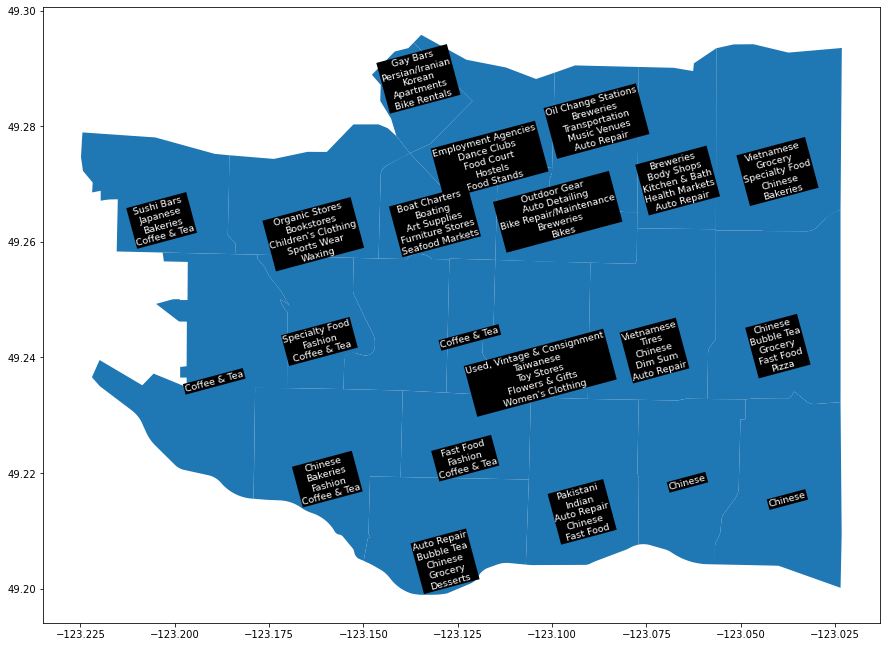

<Figure size 432x288 with 0 Axes>

In [430]:
fig,ax = plt.subplots(figsize=(15,15))
vancouvermap.plot(ax=ax); #,column='Number', legend=True);

for row in vancouvermap.iterrows():
    geo = row[1]['geometry'].centroid
    geo_len = row[1]['geometry'].length
    neighborhood = row[1]['name']
    text = ''
    for word in top_5_dict[neighborhood].keys():
        text+=word+'\n'
    text = text.strip()
    if neighborhood in ['West End','Strathcona','Mount Pleasant']:
        ax.annotate(text=text, xy=[geo.x, geo.y+0.009], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )
    elif neighborhood in ['Fairview']:
        ax.annotate(text=text, xy=[geo.x, geo.y+0.005], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )

    else:
        ax.annotate(text=text, xy=[geo.x, geo.y], color="white",ha='center',va='top',fontsize=9.5, rotation=15,
                                  bbox=dict(boxstyle='square,pad=0.1', fc='black', ec='none')
                    )

        
    # show the subplot
    ax.figure

plt.show()
plt.savefig('notable biz.svg');

# Word Cloud Graphing

In [70]:
from PIL import Image
import numpy as np

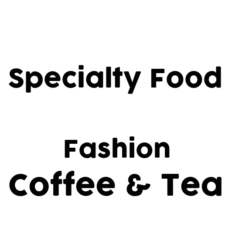

In [71]:
from wordcloud import STOPWORDS, WordCloud
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1,1)

font_path = r"fonts\Cocogoose Pro-trial.ttf"
wc = WordCloud(
    background_color="white",
    font_path=font_path,
    max_words=5,
    stopwords=STOPWORDS,
    max_font_size=256,
#     random_state=0,
#     colormap='tab10',
    width=500,
    height=500
)
wc.generate_from_frequencies(top_5_dict['Arbutus-Ridge'])
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

# Top business categories

In [337]:
vangeo_sc_df[~vangeo_sc_df['single category'].isin(yelp_categories)]['single category'].value_counts().head(10)

Coffee & Tea          879
Bars                  616
Fashion               591
Japanese              516
Specialty Food        470
Chinese               419
Sandwiches            415
Cafes                 401
Hair Salons           398
Breakfast & Brunch    397
Name: single category, dtype: int64

# Bokeh

In [323]:
from bokeh.plotting import figure, show, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, CategoricalColorMapper
from bokeh.io import output_notebook
from bokeh.palettes import viridis, d3, Spectral5, brewer
from bokeh.transform import factor_cmap

def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [324]:
output_notebook()

Loading BokehJS ...

In [325]:
vanmap_bokeh = gpd.GeoDataFrame()
vanmap_bokeh['x'] = vancouvermap.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
vanmap_bokeh['y'] = vancouvermap.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)
vanmap_bokeh = ColumnDataSource(vanmap_bokeh)

In [326]:
cluster_labels = labels # see clustering cell above
unique_clusters = sorted(vanrestaurants['clusters'].unique())
# np.random.shuffle(unique_clusters)

palette = viridis(len(unique_clusters))
color_map = {i: palette[i] for i in unique_clusters}
colors = [color_map[x] for x in cluster_labels]

vanrest_bokeh = vanrestaurants.drop(columns=['geometry'])[vanrestaurants['clusters']!=-1]
vanrest_bokeh = vanrest_bokeh.join(pd.Series(colors,name='colors'))

vanrest_bokeh = ColumnDataSource(vanrest_bokeh) 

p = figure(title="My first interactive plot!",plot_width=1000, plot_height=800)
p.patches('x','y',source=vanmap_bokeh,line_width=2,fill_color='black',line_color='white')

p.circle(x='longitude',y='latitude',
         legend_field="clusters",
         source=vanrest_bokeh,
         color='colors',
        )

show(p)

# Old code

In [ ]:
import json  
import pandas as pd  
# from pandas.io.json import json_normalize  

with open('local-area-boundary.json') as f:
    data = json.load(f)


In [ ]:
print(data[0].keys())
print(data[0]['fields'].keys())

In [ ]:
nbh_df = pd.DataFrame()
for i in range(len(data)):
    name = data[i]['fields']['name']
    print(name)
    coords = data[i]['fields']['geom']['coordinates'][0]
    unzipped_list = list(zip(*coords))
    df= pd.DataFrame(unzipped_list[0],columns=['longitude'])
    df['latitude'] = unzipped_list[1]
    df['name'] = name
    nbh_df = nbh_df.append(df) 

In [ ]:
vancouvermap

In [ ]:
geometry = [Point(xy) for xy in zip( nbh_df['longitude'],nbh_df['latitude'])]
crs = {'init':'epsg:4326'}

In [ ]:
geo_df = gpd.GeoDataFrame(nbh_df,
                          crs=crs,
                          geometry=geometry)

<AxesSubplot:>

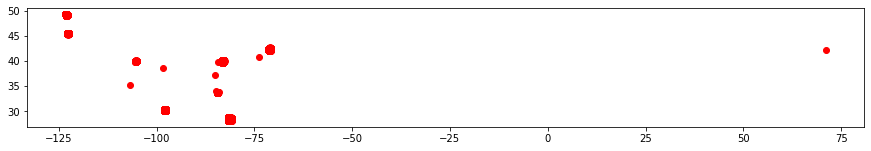

In [56]:
fig,ax = plt.subplots(figsize =(15,15))
vancouvermap.plot(ax=ax)
geo_df.plot(ax=ax, color='red')